In [1]:
using DFTK
using Plots
using LinearAlgebra

# Day 3 - Morning

## Band Theory and Density Functional Theory

We need approximations...

- symmetry
    - translation
    - others (rotations, inversion, etc.)
    
- treatment of valence electrons (core vs. valence)

- pseudopotentials

### Symmetries gives rise to bands

Electrons in a crystal form energy bands. These bands have different characteristics and give us insight into the physics

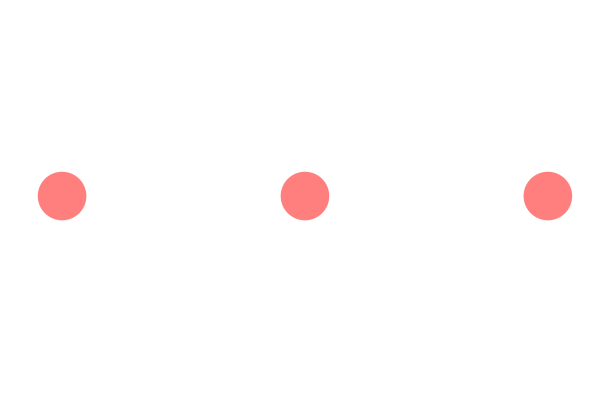

In [5]:
function circle(x, y, r)
    θ = LinRange(0, 2*π, 500)
    x .+ r*sin.(θ), y .+ r*cos.(θ)
end;
atoms = plot(circle(0,0,0.1), seriestype=[:shape], lw=0, legend=false, axis=nothing, grid=false, c=:red, linecolor=:red, fillalpha=0.5, aspect_ratio=1);
plot!(atoms, circle(-1.0,0,0.1), seriestype=[:shape], lw=0, legend=false, axis=nothing, grid=false, c=:red, linecolor=:red, fillalpha=0.5, aspect_ratio=1);
plot!(atoms, circle(1.0,0.0,0.1), seriestype=[:shape], lw=0, legend=false, axis=nothing, grid=false, c=:red, linecolor=:red, fillalpha=0.5, aspect_ratio=1);
plot!(showaxis=false)

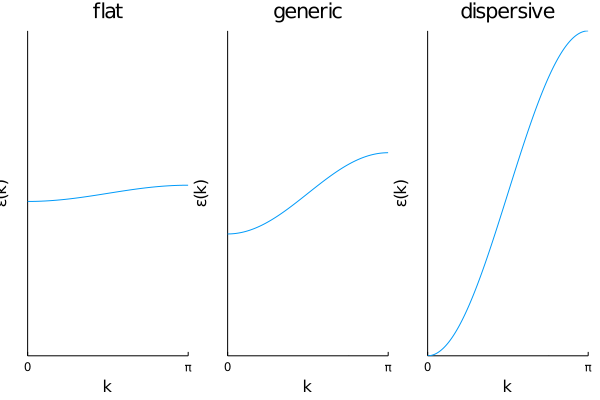

In [15]:
kx = collect(0:0.01:π)
generic = plot(kx, -0.5.*cos.(kx))
disperse = plot(kx, -2 .* cos.(kx))
flat = plot(kx, -0.1 .* cos.(kx))
plot(flat, generic, disperse, layout = (1,3), legend=false, ylim = (-2, 2), ylabel="ε(k)", xlabel="k", grid=false)
plot!(xticks=([0:π:2*π;], ["0", "\\pi"]), xlim=(0, π),yticks=false)
plot!(titles=["flat" "generic" "dispersive"])